In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import datetime

import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
from xgboost import plot_importance
from sklearn.metrics import mean_squared_error

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/competitive-data-science-predict-future-sales/shops.csv
/kaggle/input/competitive-data-science-predict-future-sales/test.csv
/kaggle/input/competitive-data-science-predict-future-sales/sample_submission.csv
/kaggle/input/competitive-data-science-predict-future-sales/sales_train.csv
/kaggle/input/competitive-data-science-predict-future-sales/item_categories.csv
/kaggle/input/competitive-data-science-predict-future-sales/items.csv


In [2]:
sales_train = pd.read_csv("/kaggle/input/competitive-data-science-predict-future-sales/sales_train.csv")
test = pd.read_csv("/kaggle/input/competitive-data-science-predict-future-sales/test.csv")
items = pd.read_csv("/kaggle/input/competitive-data-science-predict-future-sales/items.csv")
shops = pd.read_csv("/kaggle/input/competitive-data-science-predict-future-sales/shops.csv")
item_cat = pd.read_csv("/kaggle/input/competitive-data-science-predict-future-sales/item_categories.csv")

# EDA

### Explore Shops

In [3]:
len(shops)==len(shops.shop_name.unique()) # names are unique

True

In [4]:
from string import punctuation
shops["shop_name_noPunct"] = shops["shop_name"].apply(lambda name : "".join([s for s in name if s not in punctuation]))

shops


,shop_name,shop_id,shop_name_noPunct
0,"!Якутск Орджоникидзе, 56 фран",0,Якутск Орджоникидзе 56 фран
1,"!Якутск ТЦ ""Центральный"" фран",1,Якутск ТЦ Центральный фран
2,"Адыгея ТЦ ""Мега""",2,Адыгея ТЦ Мега
3,"Балашиха ТРК ""Октябрь-Киномир""",3,Балашиха ТРК ОктябрьКиномир
4,"Волжский ТЦ ""Волга Молл""",4,Волжский ТЦ Волга Молл
5,"Вологда ТРЦ ""Мармелад""",5,Вологда ТРЦ Мармелад
6,"Воронеж (Плехановская, 13)",6,Воронеж Плехановская 13
7,"Воронеж ТРЦ ""Максимир""",7,Воронеж ТРЦ Максимир
8,"Воронеж ТРЦ Сити-Парк ""Град""",8,Воронеж ТРЦ СитиПарк Град
9,Выездная Торговля,9,Выездная Торговля


### Names are unique. however some names are very very similar... like [10,11],[23,24],[0,57],[1,58]
### This should be cleaned

In [6]:
d = {0:57,1:58,23:24,11:10}
shops["shop_id"] = shops.shop_id.apply(lambda x : d[x] if x in d.keys() else x)

In [7]:
shops.groupby("shop_id").size()[shops.groupby("shop_id").size() > 1] # now we have duplicates... let's see if they are in test set

shop_id
10    2
24    2
57    2
58    2
dtype: int64

In [8]:
print(test.shop_id.unique()) # shop_id 0,1,23,11 are not in the test_set. We shall consider that in the train set

[ 5  4  6  3  2  7 10 12 28 31 26 25 22 24 21 15 16 18 14 19 42 50 49 53
 52 47 48 57 58 59 55 56 36 37 35 38 34 46 41 44 39 45]


In [9]:
# clean train.shop_id before merging : we should have the same shop_id in test and train sets, no redundance
sales_train["shop_id"] = sales_train.shop_id.apply(lambda x : d[x] if x in d.keys() else x)
print(sales_train.shop_id.unique())
# Shops that are in the training set but not in the test set are useless, we will remove them later

[59 25 24 19 22 18 21 28 27 29 26  4  6  2  3  7 57 58 16 15  8 10 14 13
 12 53 31 30 32 35 56 54 47 50 42 43 52 51 41 38 44 37 46 45  5 55 17  9
 49 39 40 48 34 33 20 36]


In [10]:
# Create feature : city (first word in shops.shop_name)
shops["city"] = pd.Series([i.split()[0] for i in shops.shop_name_noPunct])

### EXPLORE ITEM_CATEGORIES

In [11]:
#pd.options.display.max_rows = item_cat.shape[0]
item_cat

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4
...,...,...
79,Служебные,79
80,Служебные - Билеты,80
81,Чистые носители (шпиль),81
82,Чистые носители (штучные),82


In [12]:
len(item_cat)==len(item_cat.item_category_name.unique()) # names are unique

True

### EXPLORE ITEMS

In [13]:
items.describe(include='all')

,item_name,item_id,item_category_id
count,22170,22170.00000,22170.000000
unique,22170,NaN,NaN
top,ВСЕ ЛЮБЯТ КИТОВ (BD),NaN,NaN
freq,1,NaN,NaN
mean,NaN,11084.50000,46.290753
std,NaN,6400.07207,15.941486
min,NaN,0.00000,0.000000
25%,NaN,5542.25000,37.000000
50%,NaN,11084.50000,40.000000
75%,NaN,16626.75000,58.000000


In [14]:
len(items)==len(items.item_name.unique()) # items are unique
# Items that are in the training set but not in the test set are useless, we will remove them later

True

In [15]:
len(sales_train.isnull().sum()[sales_train.isnull().sum() > 0])
# no missing value

0

In [16]:
#df = train.join(items, on='item_id', rsuffix='_').join(shops, on='shop_id', rsuffix='_').join(item_cat, on='item_category_id', rsuffix='_').drop(['item_id_', 'shop_id_', 'item_category_id_'], axis=1)
df=pd.DataFrame.copy(sales_train)
df.head()


,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [17]:
# keep only the shop and item ids that are in the test set
df=df[df['shop_id'].isin(test.shop_id.unique())]
df=df[df['item_id'].isin(test.item_id.unique())]
df.shape

(1229519, 6)

# PREPARATION

### OUTLIERS ?

In [18]:
df[df.item_price< 0] # no negative prices

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day


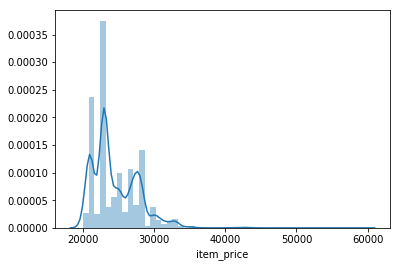

In [19]:
sns.distplot(df.item_price[df.item_price>20000])
# there may be outliers


In [20]:
df2=df.join(items, on='item_id', rsuffix='_').drop(['item_id_'], axis=1)

In [21]:
df2[df2.item_price>40000]
# The item "Доставка (EMS)" could be an outlier. The other ones seem to be pricey limited editions

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id
885138,17.09.2013,8,12,11365,59200.0,1.0,Доставка (EMS),9
2885692,23.10.2015,33,42,13403,42990.0,1.0,"Комплект ""Microsoft Xbox One 1TB Limited Edit...",16
2893100,20.10.2015,33,38,13403,41990.0,1.0,"Комплект ""Microsoft Xbox One 1TB Limited Edit...",16
2910155,20.10.2015,33,12,13403,41990.0,1.0,"Комплект ""Microsoft Xbox One 1TB Limited Edit...",16
2910156,29.10.2015,33,12,13403,42990.0,1.0,"Комплект ""Microsoft Xbox One 1TB Limited Edit...",16
2913267,22.10.2015,33,18,13403,41990.0,1.0,"Комплект ""Microsoft Xbox One 1TB Limited Edit...",16
2917760,20.10.2015,33,3,13403,42990.0,1.0,"Комплект ""Microsoft Xbox One 1TB Limited Edit...",16
2927572,22.10.2015,33,28,13403,40991.0,1.0,"Комплект ""Microsoft Xbox One 1TB Limited Edit...",16
2931380,20.10.2015,33,22,13403,42990.0,1.0,"Комплект ""Microsoft Xbox One 1TB Limited Edit...",16


In [22]:
# The item 11365 is the only one with a price over 55000 in a unique shop (the same items in other shops have an average item_price of 1650, 75% of the values are under 1950). 
# We will remove it from the db


#the item 13403 is a limited edition, sold only in month N°33...
#df = df[df.item_price<55000]
df = df[df.item_price<=40000]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
1501160,15.03.2014,14,24,20949,5.000000,405.0
1708207,28.06.2014,17,25,20949,5.000000,501.0
2257299,19.12.2014,23,12,20949,4.000000,500.0
2326930,15.01.2015,24,12,20949,4.000000,1000.0
2608040,14.04.2015,27,12,3731,1904.548077,624.0
2625847,19.05.2015,28,12,10209,1499.000000,480.0
2626181,19.05.2015,28,12,11373,155.192950,539.0
2909401,14.10.2015,33,12,20949,4.000000,500.0
2909818,28.10.2015,33,12,11373,0.908714,2169.0


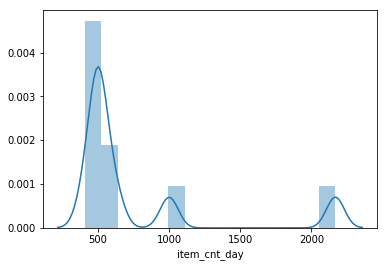

In [23]:
sns.distplot(df.item_cnt_day[df.item_cnt_day>400])
df[df.item_cnt_day>400]
# I'm quite suspicious about these items. But I will keep them for now


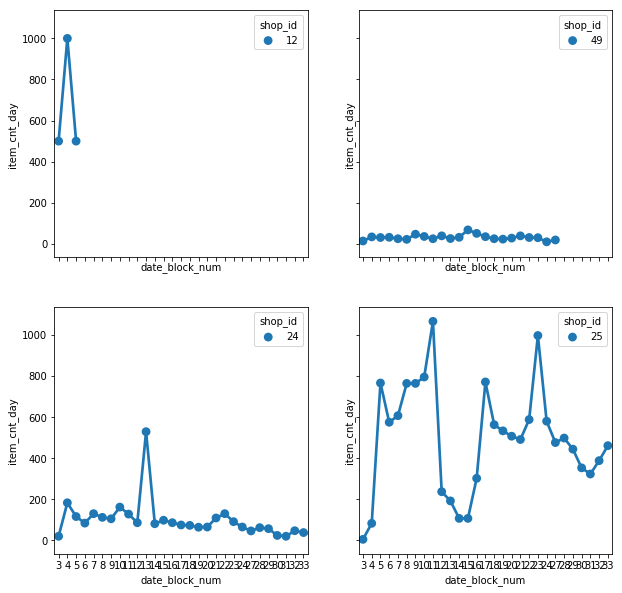

In [24]:
# Let's look at the item 20949 in some shops where it has been sold a lot
monthlyAggregated20949 = pd.DataFrame(df[df.item_id==20949].groupby(["date_block_num","shop_id"]).item_cnt_day.sum().reset_index())
monthlyAggregated20949
fig, axes = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True, figsize=(10,10))
sns.pointplot(x='date_block_num', y='item_cnt_day', hue='shop_id',data=monthlyAggregated20949[monthlyAggregated20949.shop_id==12],ax=axes[0][0])
sns.pointplot(x='date_block_num', y='item_cnt_day', hue='shop_id',data=monthlyAggregated20949[monthlyAggregated20949.shop_id==49],ax=axes[0][1])
sns.pointplot(x='date_block_num', y='item_cnt_day', hue='shop_id',data=monthlyAggregated20949[monthlyAggregated20949.shop_id==24],ax=axes[1][0])
sns.pointplot(x='date_block_num', y='item_cnt_day', hue='shop_id',data=monthlyAggregated20949[monthlyAggregated20949.shop_id==25],ax=axes[1][1])
# difficult to conclude here. Shop n°12 is a bit weird, but let's keep it that way


# MERGING Dataframes


In [25]:
grid = []
sales_train=pd.DataFrame.copy(df)
from itertools import product
# Create a grid of shops/items for each month in block_num
for block_num in sales_train['date_block_num'].unique():
    cur_shops = sales_train[sales_train['date_block_num']==block_num]['shop_id'].unique()
    cur_items = sales_train[sales_train['date_block_num']==block_num]['item_id'].unique()
    grid.append(np.array(list(product(*[cur_shops, cur_items, [block_num]])),dtype='int32'))
index_cols = ['shop_id', 'item_id', 'date_block_num']
grid = pd.DataFrame(np.vstack(grid), columns = index_cols,dtype=np.int32)

# Aggregations
sales_train['item_cnt_day'] = sales_train['item_cnt_day'].clip(0,20)
groups = sales_train.groupby(['shop_id', 'item_id', 'date_block_num'])
train = groups.agg({'item_cnt_day':'sum', 'item_price':'mean'}).reset_index()
train = train.rename(columns = {'item_cnt_day' : 'item_cnt_month'})
train['item_cnt_month'] = train['item_cnt_month'].clip(0,20)

train = pd.merge(grid,train,how='left',on=index_cols)
train.item_cnt_month = train.item_cnt_month.fillna(0)

# Get category id
train = pd.merge(train, items[['item_id', 'item_category_id']], on = 'item_id')
train = pd.merge(train, shops[['shop_id', 'city']], on = 'shop_id')

train.to_csv('trainset_with_grid.csv')
train.head()

,shop_id,item_id,date_block_num,item_cnt_month,item_price,item_category_id,city
0,59,22154,0,1.0,999.0,37,Ярославль
1,59,22154,1,0.0,NaN,37,Ярославль
2,59,22154,2,0.0,NaN,37,Ярославль
3,59,22154,3,0.0,NaN,37,Ярославль
4,59,22154,7,0.0,NaN,37,Ярославль


# Feature Engineering

#### Drop columns
#### use a label encoder
#### Create shift and mean features

In [26]:
# drop some columns
train = train[['date_block_num', 'shop_id', 'item_category_id', 'item_id',  'item_cnt_month',"city"]]
from sklearn.preprocessing import LabelEncoder
# instantiate labelencoder object
le = LabelEncoder()
train["city"] = le.fit_transform(train["city"])
shops["city"] = le.fit_transform(shops["city"])
train.head()

,date_block_num,shop_id,item_category_id,item_id,item_cnt_month,city
0,0,59,37,22154,1.0,27
1,1,59,37,22154,0.0,27
2,2,59,37,22154,0.0,27
3,3,59,37,22154,0.0,27
4,7,59,37,22154,0.0,27


In [27]:
# Shift of 1 or 2 month
feature = 'item_cnt_Month_shift_'
shift_months = [0,1,2]
def shift_item_cnt_month(df,feature,shifts):
    new_features = []
    for i in shifts:
        df[feature+str(i + 1)] = df.sort_values('date_block_num').groupby(['shop_id', 'item_id'])['item_cnt_month'].shift(i + 1)
        df[feature+str(i + 1)].fillna(0, inplace=True)
        new_features.append(feature+str(i + 1))
    return new_features,df
new_features,train = shift_item_cnt_month(train,feature,shift_months)
train.head(10)

,date_block_num,shop_id,item_category_id,item_id,item_cnt_month,city,item_cnt_Month_shift_1,item_cnt_Month_shift_2,item_cnt_Month_shift_3
0,0,59,37,22154,1.0,27,0.0,0.0,0.0
1,1,59,37,22154,0.0,27,1.0,0.0,0.0
2,2,59,37,22154,0.0,27,0.0,1.0,0.0
3,3,59,37,22154,0.0,27,0.0,0.0,1.0
4,7,59,37,22154,0.0,27,0.0,0.0,0.0
5,8,59,37,22154,0.0,27,0.0,0.0,0.0
6,9,59,37,22154,0.0,27,0.0,0.0,0.0
7,11,59,37,22154,0.0,27,0.0,0.0,0.0
8,30,59,37,22154,0.0,27,0.0,0.0,0.0
9,31,59,37,22154,0.0,27,0.0,0.0,0.0


#### Mean Encoding : items

In [28]:
df = train.copy()
df32 = df[df.date_block_num <= 32]
df33 = df[df.date_block_num <= 33]
df34 = df[df.date_block_num == 34]
mean_32 = df32[['item_id'] + ['item_cnt_month']].groupby(['item_id'], as_index=False)[['item_cnt_month']].mean()
mean_32 = mean_32.rename(columns={'item_cnt_month':'item_cnt_month_mean'})
mean_33 = df33[['item_id'] + ['item_cnt_month']].groupby(['item_id'], as_index=False)[['item_cnt_month']].mean()
mean_33 = mean_33.rename(columns={'item_cnt_month':'item_cnt_month_mean'})
df33 = df33.merge(mean_32, on = ['item_id'], how = 'left')
df34 = df34.merge(mean_33, on = ['item_id'], how = 'left')

train= pd.concat([df33, df34], axis = 0)
new_features+=['item_cnt_month_mean']

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:12: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if sys.path[0] == '':


In [29]:
grouped = train.groupby(['date_block_num', 'item_id']).agg({'item_cnt_month': ['mean']})
grouped.columns = [ 'date_item_avgItemCnt' ]
grouped.reset_index(inplace=True)

train = pd.merge(train, grouped, on=['date_block_num','item_id'], how='left')
train.head()

,city,date_block_num,item_category_id,item_cnt_Month_shift_1,item_cnt_Month_shift_2,item_cnt_Month_shift_3,item_cnt_month,item_cnt_month_mean,item_id,shop_id,date_item_avgItemCnt
0,27,0,37,0.0,0.0,0.0,1.0,0.130719,22154,59,0.435897
1,27,1,37,1.0,0.0,0.0,0.0,0.130719,22154,59,0.175000
2,27,2,37,0.0,1.0,0.0,0.0,0.130719,22154,59,0.075000
3,27,3,37,0.0,0.0,1.0,0.0,0.130719,22154,59,0.150000
4,27,7,37,0.0,0.0,0.0,0.0,0.130719,22154,59,0.048780


In [30]:

feature = 'item_cnt_Month_avg_perItem_shift_'
shift_months = [0,1]
def shift_item_cnt_month_avg_perItem(df,feature,shifts):
    new_features = []
    for i in shifts:
        df[feature+str(i + 1)] = df.sort_values('date_block_num').groupby(['shop_id', 'item_id'])['date_item_avgItemCnt'].shift(i + 1)
        df[feature+str(i + 1)].fillna(0, inplace=True)
        new_features.append(feature+str(i + 1))
    return new_features,df
new_features_,train = shift_item_cnt_month_avg_perItem(train,feature,shift_months)
new_features+=new_features_
train.head(10)

,city,date_block_num,item_category_id,item_cnt_Month_shift_1,item_cnt_Month_shift_2,item_cnt_Month_shift_3,item_cnt_month,item_cnt_month_mean,item_id,shop_id,date_item_avgItemCnt,item_cnt_Month_avg_perItem_shift_1,item_cnt_Month_avg_perItem_shift_2
0,27,0,37,0.0,0.0,0.0,1.0,0.130719,22154,59,0.435897,0.000000,0.000000
1,27,1,37,1.0,0.0,0.0,0.0,0.130719,22154,59,0.175000,0.435897,0.000000
2,27,2,37,0.0,1.0,0.0,0.0,0.130719,22154,59,0.075000,0.175000,0.435897
3,27,3,37,0.0,0.0,1.0,0.0,0.130719,22154,59,0.150000,0.075000,0.175000
4,27,7,37,0.0,0.0,0.0,0.0,0.130719,22154,59,0.048780,0.150000,0.075000
5,27,8,37,0.0,0.0,0.0,0.0,0.130719,22154,59,0.024390,0.048780,0.150000
6,27,9,37,0.0,0.0,0.0,0.0,0.130719,22154,59,0.073171,0.024390,0.048780
7,27,11,37,0.0,0.0,0.0,0.0,0.130719,22154,59,0.023810,0.073171,0.024390
8,27,30,37,0.0,0.0,0.0,0.0,0.130719,22154,59,0.177778,0.023810,0.073171
9,27,31,37,0.0,0.0,0.0,0.0,0.130719,22154,59,0.133333,0.177778,0.023810


In [31]:
grouped = train.groupby(['date_block_num', 'item_id','shop_id']).agg({'item_cnt_month': ['mean']})
grouped.columns = [ 'date_item_shop_avgItemCnt' ]
grouped.reset_index(inplace=True)

train = pd.merge(train, grouped, on=['date_block_num','item_id','shop_id'], how='left')

In [32]:
feature = 'item_cnt_Month_avg_perShop_shift_'
def shift_item_cnt_month_avg_perShop(df,feature,shifts):
    new_features = []
    for i in shifts:
        df[feature+str(i + 1)] = df.sort_values('date_block_num').groupby(['shop_id', 'item_id'])['date_item_shop_avgItemCnt'].shift(i + 1)
        df[feature+str(i + 1)].fillna(0, inplace=True)
        new_features.append(feature+str(i + 1))
    return new_features,df
new_features_,train = shift_item_cnt_month_avg_perShop(train,feature,shift_months)
new_features+=new_features_
train.head(10)

,city,date_block_num,item_category_id,item_cnt_Month_shift_1,item_cnt_Month_shift_2,item_cnt_Month_shift_3,item_cnt_month,item_cnt_month_mean,item_id,shop_id,date_item_avgItemCnt,item_cnt_Month_avg_perItem_shift_1,item_cnt_Month_avg_perItem_shift_2,date_item_shop_avgItemCnt,item_cnt_Month_avg_perShop_shift_1,item_cnt_Month_avg_perShop_shift_2
0,27,0,37,0.0,0.0,0.0,1.0,0.130719,22154,59,0.435897,0.000000,0.000000,1.0,0.0,0.0
1,27,1,37,1.0,0.0,0.0,0.0,0.130719,22154,59,0.175000,0.435897,0.000000,0.0,1.0,0.0
2,27,2,37,0.0,1.0,0.0,0.0,0.130719,22154,59,0.075000,0.175000,0.435897,0.0,0.0,1.0
3,27,3,37,0.0,0.0,1.0,0.0,0.130719,22154,59,0.150000,0.075000,0.175000,0.0,0.0,0.0
4,27,7,37,0.0,0.0,0.0,0.0,0.130719,22154,59,0.048780,0.150000,0.075000,0.0,0.0,0.0
5,27,8,37,0.0,0.0,0.0,0.0,0.130719,22154,59,0.024390,0.048780,0.150000,0.0,0.0,0.0
6,27,9,37,0.0,0.0,0.0,0.0,0.130719,22154,59,0.073171,0.024390,0.048780,0.0,0.0,0.0
7,27,11,37,0.0,0.0,0.0,0.0,0.130719,22154,59,0.023810,0.073171,0.024390,0.0,0.0,0.0
8,27,30,37,0.0,0.0,0.0,0.0,0.130719,22154,59,0.177778,0.023810,0.073171,0.0,0.0,0.0
9,27,31,37,0.0,0.0,0.0,0.0,0.130719,22154,59,0.133333,0.177778,0.023810,0.0,0.0,0.0


# Testset preparation and Splitting

In [33]:
test = pd.read_csv("/kaggle/input/competitive-data-science-predict-future-sales/test.csv")
test_set=train.query('date_block_num == 33').copy()

test=test.join(items, on='item_id', rsuffix='_').join(shops, on='shop_id', rsuffix='_').drop(['item_id_', 'shop_id_'], axis=1)
test=test[['shop_id', 'item_id', 'item_category_id','city']]
test=pd.merge(test, test_set, on=['shop_id', 'item_id','city','item_category_id'], how='left')
#test=test[['shop_id', 'item_id', 'item_category_id','city']]
#test["city"] = le.fit_transform(test["city"])
##test.rename(columns={'item_category_id_x': 'item_category_id'}, inplace=True)
test["date_block_num"] = 34
test['item_cnt_month'] = -1
test.fillna(0, inplace=True)
print(test.shape)
#test.head(20)


(214200, 16)


In [34]:
train_test_set = pd.concat([train, test], axis = 0) 
train_test_set.head(10)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,city,date_block_num,date_item_avgItemCnt,date_item_shop_avgItemCnt,item_category_id,item_cnt_Month_avg_perItem_shift_1,item_cnt_Month_avg_perItem_shift_2,item_cnt_Month_avg_perShop_shift_1,item_cnt_Month_avg_perShop_shift_2,item_cnt_Month_shift_1,item_cnt_Month_shift_2,item_cnt_Month_shift_3,item_cnt_month,item_cnt_month_mean,item_id,shop_id
0,27,0,0.435897,1.0,37,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.130719,22154,59
1,27,1,0.175000,0.0,37,0.435897,0.000000,1.0,0.0,1.0,0.0,0.0,0.0,0.130719,22154,59
2,27,2,0.075000,0.0,37,0.175000,0.435897,0.0,1.0,0.0,1.0,0.0,0.0,0.130719,22154,59
3,27,3,0.150000,0.0,37,0.075000,0.175000,0.0,0.0,0.0,0.0,1.0,0.0,0.130719,22154,59
4,27,7,0.048780,0.0,37,0.150000,0.075000,0.0,0.0,0.0,0.0,0.0,0.0,0.130719,22154,59
5,27,8,0.024390,0.0,37,0.048780,0.150000,0.0,0.0,0.0,0.0,0.0,0.0,0.130719,22154,59
6,27,9,0.073171,0.0,37,0.024390,0.048780,0.0,0.0,0.0,0.0,0.0,0.0,0.130719,22154,59
7,27,11,0.023810,0.0,37,0.073171,0.024390,0.0,0.0,0.0,0.0,0.0,0.0,0.130719,22154,59
8,27,30,0.177778,0.0,37,0.023810,0.073171,0.0,0.0,0.0,0.0,0.0,0.0,0.130719,22154,59
9,27,31,0.133333,0.0,37,0.177778,0.023810,0.0,0.0,0.0,0.0,0.0,0.0,0.130719,22154,59


In [35]:
len(train_test_set.isnull().sum()[train_test_set.isnull().sum() > 0])
train_test_set=train_test_set.dropna()

In [36]:
train_test_set[train_test_set['date_block_num']==34]

,city,date_block_num,date_item_avgItemCnt,date_item_shop_avgItemCnt,item_category_id,item_cnt_Month_avg_perItem_shift_1,item_cnt_Month_avg_perItem_shift_2,item_cnt_Month_avg_perShop_shift_1,item_cnt_Month_avg_perShop_shift_2,item_cnt_Month_shift_1,item_cnt_Month_shift_2,item_cnt_Month_shift_3,item_cnt_month,item_cnt_month_mean,item_id,shop_id
0,3,34,0.608696,0.0,19,2.555556,2.777778,1.0,3.0,1.0,3.0,1.0,-1.0,2.020513,5037,5
1,3,34,0.000000,0.0,55,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,-1.0,0.000000,5320,5
2,3,34,1.000000,1.0,19,1.933333,3.488889,3.0,1.0,3.0,1.0,0.0,-1.0,1.759259,5233,5
3,3,34,0.673913,0.0,23,1.133333,1.577778,0.0,1.0,0.0,1.0,0.0,-1.0,1.355556,5232,5
4,3,34,0.000000,0.0,20,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,-1.0,0.000000,5268,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214195,20,34,0.000000,0.0,55,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,-1.0,0.000000,18454,45
214196,20,34,0.000000,0.0,64,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,-1.0,0.000000,16188,45
214197,20,34,0.000000,0.0,55,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,-1.0,0.000000,15757,45
214198,20,34,0.000000,0.0,40,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,-1.0,0.000000,19648,45


In [37]:
features = ['shop_id', 'item_id', 'item_category_id', 'date_block_num'] + new_features + ['item_cnt_month']

train_test_set['item_cnt_month'] = train_test_set.item_cnt_month.fillna(0).clip(0,20)

period = 24



train = train_test_set[(train_test_set['date_block_num'] >= 22) & (train_test_set['date_block_num'] <= 32)]
valid = train_test_set[train_test_set['date_block_num'] == 33]
test = train_test_set[train_test_set['date_block_num'] == 34]

train=train[features]
valid=valid[features]
test=test[features]

train_vals=train.values.astype(int)
trainx = train_vals[:, 0:len(features) - 1]
trainy = train_vals[:, len(features) - 1]
valid_vals=valid.values.astype(int)
validx = valid_vals[:, 0:len(features) - 1]
validy = valid_vals[:, len(features) - 1]
test_vals=test.values.astype(int)
testx = test_vals[:, 0:len(features) - 1]
test.head()

,shop_id,item_id,item_category_id,date_block_num,item_cnt_Month_shift_1,item_cnt_Month_shift_2,item_cnt_Month_shift_3,item_cnt_month_mean,item_cnt_Month_avg_perItem_shift_1,item_cnt_Month_avg_perItem_shift_2,item_cnt_Month_avg_perShop_shift_1,item_cnt_Month_avg_perShop_shift_2,item_cnt_month
0,5,5037,19,34,1.0,3.0,1.0,2.020513,2.555556,2.777778,1.0,3.0,0.0
1,5,5320,55,34,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0
2,5,5233,19,34,3.0,1.0,0.0,1.759259,1.933333,3.488889,3.0,1.0,0.0
3,5,5232,23,34,0.0,1.0,0.0,1.355556,1.133333,1.577778,0.0,1.0,0.0
4,5,5268,20,34,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0


# MODEL

In [38]:
model = xgb.XGBRegressor(max_depth = 5, min_child_weight=250, colsample_bytree=0.8,subsample = 0.8, learning_rate = 0.07, n_estimators = 1000, seed = 1, nthread = 8)
model.fit(trainx, trainy, eval_metric='rmse')
p = model.predict(validx)
p = np.clip(p, 0,20)
print('val set rmse: ', np.sqrt(mean_squared_error(validy, p)))

[16:12:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
val set rmse:  0.7929745630861601


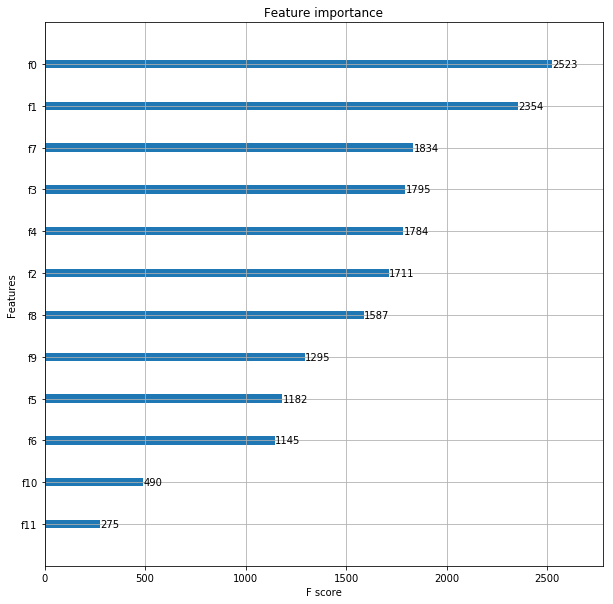

In [39]:
model.feature_importances_
def plot_features(booster, figsize):    
    fig, ax = plt.subplots(1,1,figsize=figsize)
    return plot_importance(booster=booster, ax=ax)
plot_features(model, (10,10))

In [40]:
p = model.predict(testx)
p = np.clip(p, 0,20)
df = pd.DataFrame(p, columns = ['item_cnt_month'])
df['ID'] = df.index
df.set_index('ID')
df.to_csv('predictions.csv')
print('test predictions written to file')
df.shape

test predictions written to file


(214200, 2)